### Concatenating multiple csv files and loading the data


In [154]:
from pathlib import Path
import pandas as pd

folder_path = Path("C:/AnBui/Learning_materials/Personal_project/Code file/review_scraped")

csv_files = folder_path.glob("*.csv")

dfs = []

for file in csv_files:
    df = pd.read_csv(file, encoding='utf-8')
    dfs.append(df)
    
new_df = pd.concat(dfs, ignore_index=True)

new_df_1 = new_df.drop('Review ID', axis=1)
print(new_df_1.head())

# Save the concatenated DataFrame to a new CSV file
output_file = folder_path / "concatenated_reviews.csv"
new_df_1.to_csv(output_file, index=False, encoding='utf-8-sig')
print("Concatenated file saved:", output_file)

                                         Review Text
0  I just installed it and it was very easy, pack...
1  2nd time was a charm & works like a dream! Thi...
2  Works pretty well overall. Rear wash does what...
3  We've had this for about two weeks now. After ...
4  We really like the alpha bidet. It is easy to ...
Concatenated file saved: C:\AnBui\Learning_materials\Personal_project\Code file\review_scraped\concatenated_reviews.csv


### Data Exploration

In [155]:
new_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3633 entries, 0 to 3632
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review Text  3627 non-null   object
dtypes: object(1)
memory usage: 28.5+ KB


In [156]:
new_df_1.isnull().sum()

Review Text    6
dtype: int64

In [157]:
cleaned_df = new_df_1.dropna(subset=['Review Text'])
cleaned_df['Review Text'] = cleaned_df['Review Text'].astype(str)

C:\Users\An Bui\AppData\Local\Temp\ipykernel_22232\3470604058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Review Text'] = cleaned_df['Review Text'].astype(str)


### Preprocessing the dataset

In [158]:
# Loading the imported libraries
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import emoji

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Define extended stopwords list outside the function for efficiency
default_stopwords = set(stopwords.words('english'))
additional_stopwords = {
    'one', 'like', 'well', 'really', 'would', 'need', 'year', 'back', 'toto', 'brondell', 
    'bidet', 'toilet', 'little', 'much', 'good', 'great', 'best', 'better', 'even', 'still', 
    'also', 'ever', 'every', 'thing', 'something', 'nothing', 'anything', 'everything', 
    'another', 'first', 'last', 'next', 'second', 'third', 'many', 'lot', 'few', 'plenty', 
    'some', 'all', 'most', 'more', 'less', 'least', 'fewer', 'lot', 'plenty', 'kind', 'sort', 
    'type', 'way', 'day', 'week', 'month', 'year', 'time', 'hour', 'minute', 'second', 
    'morning', 'afternoon', 'evening', 'night', 'today', 'tomorrow', 'yesterday', 'now',
}
extended_stopwords = default_stopwords.union(additional_stopwords)

[nltk_data] Downloading package stopwords to C:\Users\An
[nltk_data]     Bui\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\An
[nltk_data]     Bui\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\An
[nltk_data]     Bui\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [159]:
# Define the clean_text function
def clean_text(text):
    """Cleans the input text by applying various preprocessing steps."""
    if isinstance(text, str):
        # Convert text to lowercase
        text = text.lower()
        # Remove punctuation and special characters
        text = re.sub(r'\W+', ' ', text)
        # Remove words with 2 or fewer letters
        text = re.sub(r'\b\w{1,2}\b', '', text)
        # Remove extra spaces
        text = re.sub(r'\s+', ' ', text).strip()
        # Convert emojis to text
        text = emoji.demojize(text)
        # Tokenize and remove stopwords
        tokens = word_tokenize(text)
        filtered_tokens = [token for token in tokens if token not in extended_stopwords]
        # Lemmatize tokens
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
        # Rejoin tokens into a single string
        return ' '.join(lemmatized_tokens)
    else:
        # Return empty string for non-string input
        return ''

# Apply the clean_text function to your DataFrame
new_df_1['clean_text'] = new_df_1['Review Text'].apply(clean_text)
# Drop the original 'Review Text' column
new_df_1.drop('Review Text', axis=1, inplace=True)

In [160]:
# Calculate the polarity of the reviews
from textblob import TextBlob

def get_polarity(text):
    return TextBlob(text).sentiment.polarity
new_df_1['Polarity'] = new_df_1['clean_text'].apply(get_polarity)
new_df_1.head(5)

,clean_text,Polarity
0,installed easy package contained needed took m...,0.212798
1,2nd charm work dream dang easy install took mi...,0.069431
2,work pretty overall rear wash supposed speak f...,-0.105556
3,two week old seat broke decided give seat try ...,0.098327
4,alpha easy use work,0.433333


### Sentiment analysis

In [117]:
# Counting the word frequency
from collections import Counter

tokens = new_df_1['clean_text'].str.split().explode()

word_freq = Counter(tokens)
word_freq_df = pd.DataFrame(word_freq.items(), columns = ['word','count']).sort_values(by='count', ascending=False)

print(word_freq_df.head(20))

         word  count
110      seat   4840
46      water   3413
73        use   1723
99        get   1509
25       work   1457
1        easy   1360
150    remote   1281
37    feature   1254
145   install   1168
506   product   1080
297      warm   1062
227     clean    957
136  bathroom    899
308      unit    886
50     heated    853
36       love    821
35   pressure    817
66       used    770
433      make    757
230   control    713


                                       bigram  count
9841            (heated, seat, heated, water)     34
5231                (warm, seat, warm, water)     21
15771             (heated, seat, warm, water)     16
9604              (warm, water, heated, seat)     16
6855            (heated, water, heated, seat)     13
23237              (easy, install, easy, use)     12
14701               (seat, warm, water, warm)      9
47037                (auto, open, close, lid)      9
33141                (warm, water, warm, air)      8
3428                (warm, water, warm, seat)      8
29405                (soft, close, seat, lid)      8
47414               (never, run, warm, water)      7
46561            (remote, control, easy, use)      7
7384               (air, dryer, heated, seat)      7
211             (easy, install, took, minute)      6
48468  (nozzle, position, water, temperature)      6
15200       (company, stand, behind, product)      6
11669               (water, temp, seat, temp) 

<Figure size 1500x700 with 0 Axes>

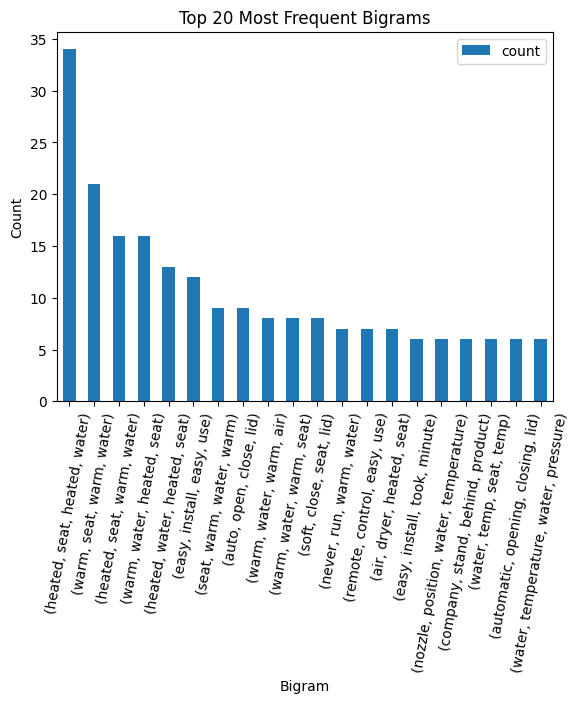

In [161]:
import matplotlib.pyplot as plt
from nltk.util import ngrams

# Filter out rows with empty 'clean_text' or not enough tokens for 4-grams
new_df_1_filtered = new_df_1[new_df_1['clean_text'].apply(lambda x: isinstance(x, str) and len(x.split()) >= 4)]

# Update the n-gram extraction to ensure it only processes valid texts
def extract_ngrams_safe(text, n):
    tokens = text.split()
    if len(tokens) < n:
        return []  # Return an empty list if not enough tokens for n-grams
    return list(ngrams(tokens, n))

# Apply the updated function
bigrams = new_df_1_filtered['clean_text'].apply(lambda x: extract_ngrams_safe(x, 4)).explode()

# Proceed with frequency count and visualization as before
bigram_freq = Counter(bigrams)
bigram_freq_df = pd.DataFrame(bigram_freq.items(), columns=['bigram', 'count']).sort_values(by='count', ascending=False)

# Display and visualize the results, skipping any NaN entries
bigram_freq_df = bigram_freq_df.dropna()  # Drop rows with NaN values
print(bigram_freq_df.head(20))

# Visualization code re# Visualize the top 20 most frequent bigrams
plt.figure(figsize=(15, 7))
bigram_freq_df.head(20).set_index('bigram').plot(kind='bar')
plt.title("Top 20 Most Frequent Bigrams")
plt.ylabel("Count")
plt.xlabel("Bigram")
plt.xticks(rotation=80)
plt.show()


In [162]:
N = 20
top_bigrams = bigram_freq_df.head(N)['bigram'].tolist()
print(top_bigrams)

[('heated', 'seat', 'heated', 'water'), ('warm', 'seat', 'warm', 'water'), ('heated', 'seat', 'warm', 'water'), ('warm', 'water', 'heated', 'seat'), ('heated', 'water', 'heated', 'seat'), ('easy', 'install', 'easy', 'use'), ('seat', 'warm', 'water', 'warm'), ('auto', 'open', 'close', 'lid'), ('warm', 'water', 'warm', 'air'), ('warm', 'water', 'warm', 'seat'), ('soft', 'close', 'seat', 'lid'), ('never', 'run', 'warm', 'water'), ('remote', 'control', 'easy', 'use'), ('air', 'dryer', 'heated', 'seat'), ('easy', 'install', 'took', 'minute'), ('nozzle', 'position', 'water', 'temperature'), ('company', 'stand', 'behind', 'product'), ('water', 'temp', 'seat', 'temp'), ('automatic', 'opening', 'closing', 'lid'), ('water', 'temperature', 'water', 'pressure')]


In [163]:
def replace_bigrams(text, bigrams):
    for bigram in bigrams:
        space_bigram = ' '.join(bigram)
        underscored_bigram = '_'.join(bigram)
        text = text.replace(space_bigram, underscored_bigram)
    return text
top_bigrams = bigram_freq_df.head(N)['bigram'].tolist()

new_df_1['clean_text'] = new_df_1['clean_text'].apply(lambda x: replace_bigrams(x, top_bigrams))
new_df_1.head(5)

,clean_text,Polarity
0,installed easy package contained needed took m...,0.212798
1,2nd charm work dream dang easy_install_took_mi...,0.069431
2,work pretty overall rear wash supposed speak f...,-0.105556
3,two week old seat broke decided give seat try ...,0.098327
4,alpha easy use work,0.433333


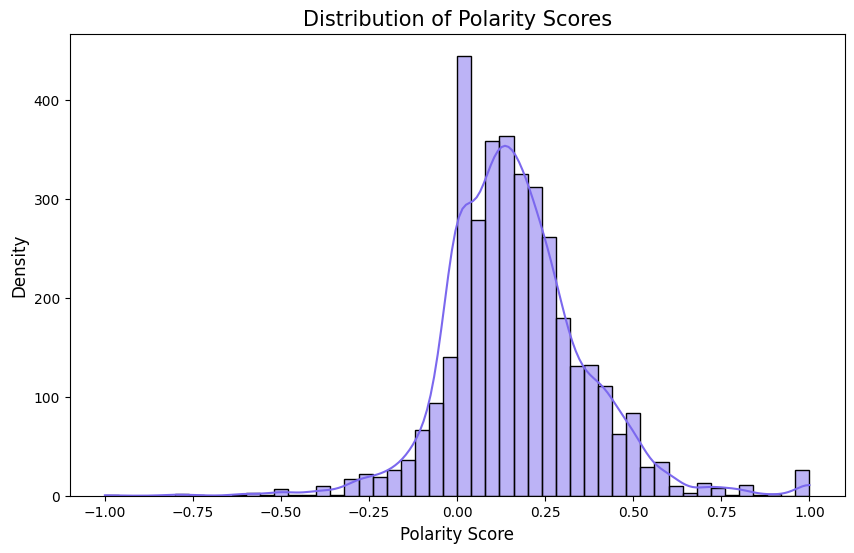

In [164]:
import seaborn as sns
# Plotting the distribution of polarity scores
plt.figure(figsize=(10, 6))
sns.histplot(new_df_1['Polarity'], bins=50, color="mediumslateblue", kde=True)
plt.title('Distribution of Polarity Scores', fontsize=15)
plt.xlabel('Polarity Score', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

In [165]:
# Function to categorize the sentiment based on polarity
def categorize_sentiment(polarity):
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Categorize sentiments
new_df_1['Sentiment'] = new_df_1['Polarity'].apply(categorize_sentiment)

# Display the first few rows with sentiment results
new_df_1.head(5)

,clean_text,Polarity,Sentiment
0,installed easy package contained needed took m...,0.212798,Positive
1,2nd charm work dream dang easy_install_took_mi...,0.069431,Positive
2,work pretty overall rear wash supposed speak f...,-0.105556,Negative
3,two week old seat broke decided give seat try ...,0.098327,Positive
4,alpha easy use work,0.433333,Positive


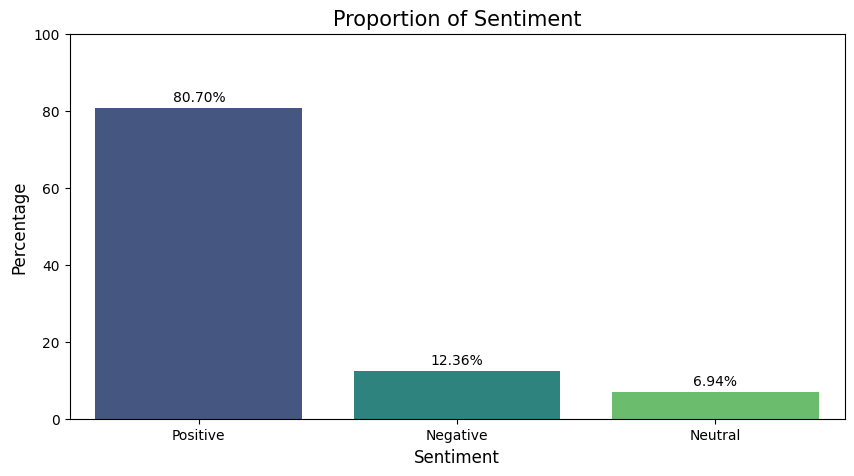

In [166]:
sentiment_counts =new_df_1['Sentiment'].value_counts(normalize=True)*100

plt.figure(figsize=(10,5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values,palette='viridis')
plt.title('Proportion of Sentiment', fontsize=15)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.ylim(0,100)

for index, value in enumerate(sentiment_counts.values):
    plt.text(index, value+1, f'{value:.2f}%',ha='center', va='bottom', fontsize=10)
plt.show()

In [167]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

c:\Users\An Bui\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


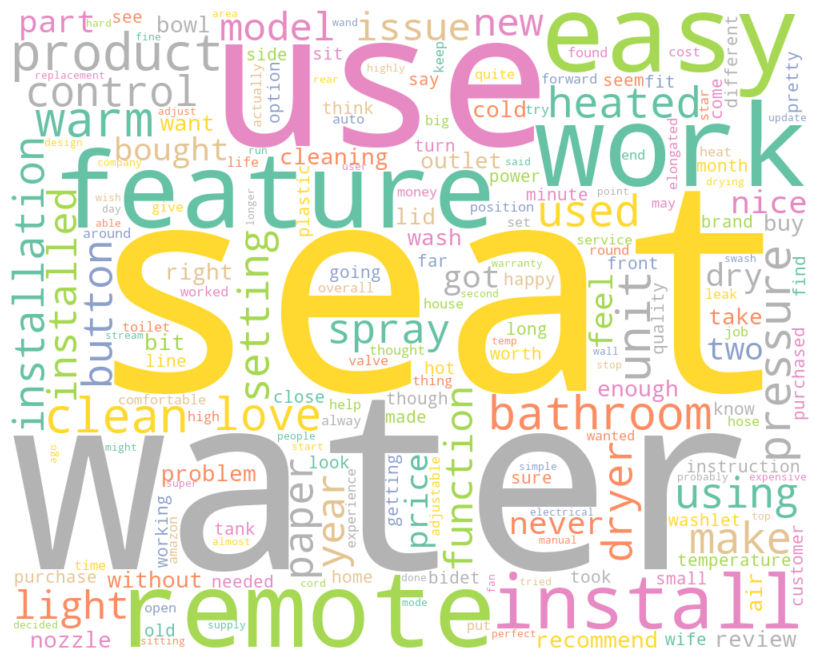

In [179]:
# Generate word cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Combine all reviews into one big text
comment_words = ' '.join(new_df_1['clean_text'].astype(str))

# Set of stopwords
stopwords = set(STOPWORDS)

# Create a WordCloud object
wordcloud = WordCloud(width=1000, height=800, 
                      background_color='white', colormap='Set2', 
                      collocations=False, stopwords=stopwords, 
                      min_font_size=12).generate(comment_words)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [169]:
# Import the necessary libraries to conduct LDA modeling
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel

from pprint import pprint

import spacy

import pickle
import re 
import pyLDAvis
import pyLDAvis.gensim
from gensim.models.ldamodel import LdaModel

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [170]:
# Tokenize the text
tokenized_texts = new_df_1['clean_text'].apply(lambda x: x.split())
id2word = Dictionary(tokenized_texts)
corpus = [id2word.doc2bow(text) for text in tokenized_texts] # convert to bag of words format first
print(corpus[:1])

[[(0, 1), (1, 1), (2, 3), (3, 2), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1), (30, 1), (31, 1), (32, 2), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 2), (41, 1), (42, 3), (43, 2), (44, 1), (45, 1), (46, 1), (47, 3), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 5), (54, 2), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 2), (61, 1), (62, 1), (63, 2), (64, 1), (65, 4), (66, 2), (67, 1), (68, 2), (69, 2), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 2), (77, 6), (78, 1), (79, 1), (80, 3), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 2), (91, 1), (92, 3), (93, 1), (94, 2), (95, 2), (96, 1), (97, 1), (98, 1), (99, 1), (100, 3), (101, 1), (102, 2), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 3)

In [171]:
# Train the LDA model
[[(id2word[i], freq) for i, freq in doc] for doc in corpus[:1]]

[[('absolutely', 1),
  ('added', 1),
  ('additional', 3),
  ('adjust', 2),
  ('air', 2),
  ('already', 1),
  ('always', 1),
  ('anybody', 1),
  ('anyway', 1),
  ('attached', 1),
  ('attachment', 1),
  ('automatically', 1),
  ('bang', 1),
  ('bathroom', 1),
  ('beginning', 1),
  ('blower', 1),
  ('bought', 1),
  ('buck', 1),
  ('bumper', 1),
  ('button', 2),
  ('came', 1),
  ('cleaner', 1),
  ('cleaning', 1),
  ('close', 1),
  ('comfortable', 1),
  ('contained', 1),
  ('cord', 1),
  ('cost', 2),
  ('decided', 1),
  ('designated', 1),
  ('dry', 1),
  ('dryer', 1),
  ('easy', 2),
  ('effort', 1),
  ('electricity', 1),
  ('else', 1),
  ('energy', 1),
  ('enjoy', 1),
  ('enjoyable', 1),
  ('enough', 1),
  ('especially', 2),
  ('extra', 1),
  ('feature', 3),
  ('feeling', 2),
  ('feminine', 1),
  ('flat', 1),
  ('front', 1),
  ('get', 3),
  ('gfci', 1),
  ('green', 1),
  ('hair', 1),
  ('happier', 1),
  ('happy', 1),
  ('heated', 5),
  ('heater', 2),
  ('heating', 1),
  ('higher', 1),
  ('ho

In [172]:
# Train the LDA model
coherence_values = []
model_list = []
for num_topics in range(2, 12, 2):  # Adjust the range as needed
    model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, 
                     random_state=50, passes=10, alpha='auto', eta='auto')
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=tokenized_texts, dictionary=id2word, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())


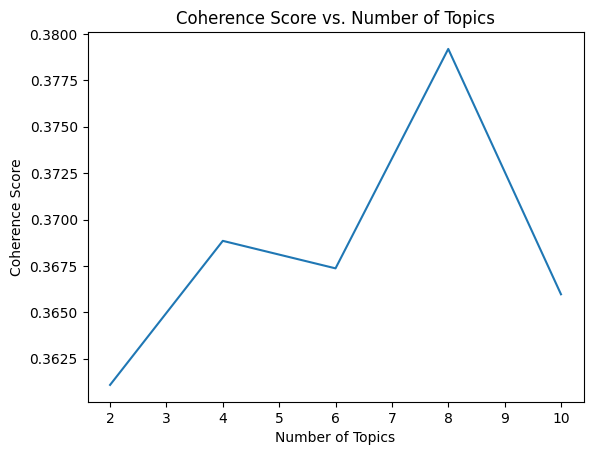

In [173]:
# Plot the coherence scores
plt.plot(range(2, 12, 2), coherence_values)  # Adjust the range to match the loop
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.show()


In [174]:
# Train the LDA model
lda_model = LdaModel(corpus = corpus,
                     id2word = id2word,
                     num_topics=7,
                     random_state=50,
                     passes=10,
                     per_word_topics=True,
                     chunksize=1000,
                     alpha='auto'
)

In [176]:
# Print the topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.024*"product" + 0.014*"unit" + 0.013*"work" + 0.013*"customer" + '
  '0.012*"install" + 0.012*"easy" + 0.011*"service" + 0.009*"vovo" + '
  '0.008*"issue" + 0.007*"new"'),
 (1,
  '0.024*"seat" + 0.021*"water" + 0.011*"valve" + 0.010*"installation" + '
  '0.008*"hose" + 0.008*"install" + 0.008*"fit" + 0.007*"tank" + 0.007*"line" '
  '+ 0.007*"instruction"'),
 (2,
  '0.033*"seat" + 0.017*"water" + 0.013*"remote" + 0.010*"button" + '
  '0.010*"feature" + 0.009*"light" + 0.008*"setting" + 0.007*"work" + '
  '0.007*"use" + 0.007*"get"'),
 (3,
  '0.005*"s7a" + 0.004*"heated_seat_warm_water" + 0.004*"drawing" + '
  '0.004*"lcd" + 0.004*"write" + 0.003*"robot" + 0.003*"coolest" + '
  '0.003*"horrible" + 0.003*"yikes" + 0.003*"heart"'),
 (4,
  '0.025*"seat" + 0.022*"water" + 0.015*"use" + 0.012*"get" + 0.011*"warm" + '
  '0.011*"easy" + 0.011*"love" + 0.010*"clean" + 0.008*"bathroom" + '
  '0.008*"work"'),
 (5,
  '0.015*"year" + 0.014*"working" + 0.013*"new" + 0.012*"month" + '
  '0.0

In [177]:
# 
coherence_model = coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_texts, dictionary=id2word, coherence='c_v') 
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence score:', coherence_lda)


Coherence score: 0.47991757437937516


In [178]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.195379  0.040897       1        1  39.322111
2      0.150679  0.093930       2        1  30.624831
1      0.102111  0.096133       3        1  12.358836
0      0.080454 -0.171648       4        1  10.560885
5     -0.074111 -0.212872       5        1   4.290478
6     -0.189544  0.089657       6        1   2.200520
3     -0.264967  0.063904       7        1   0.642339, topic_info=         Term         Freq        Total Category  logprob  loglift
112      seat  4519.000000  4519.000000  Default  30.0000  30.0000
508   product  1008.000000  1008.000000  Default  29.0000  29.0000
355      unit   755.000000   755.000000  Default  28.0000  28.0000
364      year   543.000000   543.000000  Default  27.0000  27.0000
206       new   548.000000   548.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
2188   beauty     2.327058     4.692924   Topic7  -6.2658   4.3464
1287     word     2.841646    37.239822   Topic7  -6.0661   2.4748
1181   heaven     2.472347     9.070831   Topic7  -6.2053   3.7479
1184      man     2.814652    55.097826   Topic7  -6.0756   2.0735
195      life     2.322990   252.933277   Topic7  -6.2676   0.3575

[496 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1143      1  0.311977   1000
1143      2  0.334805   1000
1143      3  0.106529   1000
1143      4  0.060874   1000
1143      5  0.038046   1000
...     ...       ...    ...
364       3  0.011036   year
364       4  0.123240   year
364       5  0.222567   year
364       6  0.016555   year
5957      7  0.915683  yikes

[998 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 2, 1, 6, 7, 4])